# Reviewing Sars-cov-2 variants downloaded from viralZone

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sars-cov-2-variants/sars_cov_2_variants.fasta


## Import libraries

In [2]:
from Bio import SeqIO
from Bio.Seq import Seq
import Bio
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from Bio import AlignIO, Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
import matplotlib.pyplot as plt

## parsing fasta files to readable text in python

In [3]:
data_path = "/kaggle/input/sars-cov-2-variants/sars_cov_2_variants.fasta"
fasta = list(SeqIO.parse(data_path, format = "fasta"))
for entry in fasta:
    print(entry.description)
fasta

NC_045512.2 | Wuhan_strain
B.1.1.7 | Alpha
B.1.351 | Beta
B.1.617.2 | DeltA
B.1.1.28.1 | Gamma
B.1.1.529 | Omicron


[SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 | Wuhan_strain', dbxrefs=[]),
 SeqRecord(seq=Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...TGA'), id='B.1.1.7', name='B.1.1.7', description='B.1.1.7 | Alpha', dbxrefs=[]),
 SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='B.1.351', name='B.1.351', description='B.1.351 | Beta', dbxrefs=[]),
 SeqRecord(seq=Seq('ACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATC...TCT'), id='B.1.617.2', name='B.1.617.2', description='B.1.617.2 | DeltA', dbxrefs=[]),
 SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...GAG'), id='B.1.1.28.1', name='B.1.1.28.1', description='B.1.1.28.1 | Gamma', dbxrefs=[]),
 SeqRecord(seq=Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...GAA'), id='B.1.1.529', name='B.1.1.529', description='B.1.1.529 | Omicron', dbxrefs=[])]

## extract each strain from the MSA using the sequence ID

In [4]:
seqs = {}
for entry in fasta:
    seqs[entry.id] = entry
wuhan_strain = "NC_045512.2"
seqs[wuhan_strain]

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 | Wuhan_strain', dbxrefs=[])

In [5]:
#Show one strain
seqs[wuhan_strain].seq

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [6]:
#strain length overview
for entry in fasta:
    print(len(entry.seq))

29903
29694
29885
29821
29859
29684


## perform multiple sequence allignment

We see that the variants are not all identical. we will need to allign them using mafft algorithm
MAFFT: a novel method for rapid multiple sequence alignment based on fast Fourier transform
source: Katoh K, Misawa K, Kuma K, Miyata T. MAFFT: a novel method for rapid multiple sequence alignment based on fast Fourier transform. Nucleic Acids Res. 2002 Jul 15;30(14):3059-66. doi: 10.1093/nar/gkf436. PMID: 12136088; PMCID: PMC135756.

In [7]:
#install mafft
!apt-get install -yq mafft


Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  blast2 fonts-lato javascript-common libauthen-sasl-perl libdata-dump-perl
  libencode-locale-perl libfile-listing-perl libfont-afm-perl
  libhtml-form-perl libhtml-format-perl libhtml-parser-perl
  libhtml-tagset-perl libhtml-tree-perl libhttp-cookies-perl
  libhttp-daemon-perl libhttp-date-perl libhttp-message-perl
  libhttp-negotiate-perl libidn11 libio-html-perl libio-socket-ssl-perl
  libjs-jquery liblwp-mediatypes-perl liblwp-protocol-https-perl
  libmailtools-perl libmbedcrypto3 libmbedtls12 libmbedx509-0 libnet-http-perl
  libnet-smtp-ssl-perl libnet-ssleay-perl libruby2.7 libtimedate-perl
  libtry-tiny-perl liburi-perl libwww-perl libwww-robotrules-perl lynx
  lynx-common ncbi-blast+ ncbi-blast+-legacy ncbi-data netbase
  perl-openssl-defaults rake ruby ruby-minitest ruby-net-telnet
  ruby-power-assert ruby-test-unit ruby-xmlrpc ruby2.7 rubyge

In [8]:
#multiple sequence allignment with maft
!mafft /kaggle/input/sars-cov-2-variants/sars_cov_2_variants.fasta > /kaggle/working/aligned_sequences.fasta

nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 30 ambiguous characters.
    1 / 6
done.

Constructing a UPGMA tree (efffree=0) ... 
    0 / 6
done.

Progressive alignment 1/2... 
STEP     5 / 5  f
done.

Making a distance matrix from msa.. 
    0 / 6
done.

Constructing a UPGMA tree (efffree=1) ... 
    0 / 6
done.

Progressive alignment 2/2... 
STEP     5 / 5  f
done.

disttbfast (nuc) Version 7.453
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert more ga

In [9]:
!ls

__notebook__.ipynb  aligned_sequences.fasta


## parsing the alligned file

In [10]:
#parsing the aligned file
fasta = list(SeqIO.parse("aligned_sequences.fasta", format = "fasta"))
for entry in fasta:
    print(entry.description)
    print(1)
fasta


NC_045512.2 | Wuhan_strain
1
B.1.1.7 | Alpha
1
B.1.351 | Beta
1
B.1.617.2 | DeltA
1
B.1.1.28.1 | Gamma
1
B.1.1.529 | Omicron
1


[SeqRecord(seq=Seq('attaaaggtttataccttcccaggtaacaaaccaaccaactttcgatctcttgt...aaa'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 | Wuhan_strain', dbxrefs=[]),
 SeqRecord(seq=Seq('------------------------------------------------------...---'), id='B.1.1.7', name='B.1.1.7', description='B.1.1.7 | Alpha', dbxrefs=[]),
 SeqRecord(seq=Seq('attaaaggtttataccttcccaggtaacaaaccaaccaactttcgatctcttgt...aaa'), id='B.1.351', name='B.1.351', description='B.1.351 | Beta', dbxrefs=[]),
 SeqRecord(seq=Seq('------------------------------accaaccaactttcgatctcttgt...---'), id='B.1.617.2', name='B.1.617.2', description='B.1.617.2 | DeltA', dbxrefs=[]),
 SeqRecord(seq=Seq('attaaaggtttataccttcccaggtaacaaaccaaccaactttcgatctcttgt...---'), id='B.1.1.28.1', name='B.1.1.28.1', description='B.1.1.28.1 | Gamma', dbxrefs=[]),
 SeqRecord(seq=Seq('------------------------------------------------------...---'), id='B.1.1.529', name='B.1.1.529', description='B.1.1.529 | Omicron', dbxrefs=[])]

In [11]:
#checking the length of the alligned variants
seq_des = {}
for entry in fasta:
    seq_des[entry.id] = entry.description
    print(len(entry.seq))


29916
29916
29916
29916
29916
29916


Here we have the alligned variants with equal lenghts using the mafft algorithm

Focusing on the spike protein, let's start with the wuhan strain. from Ncbi, the wuhan strain spike prtotein starting and ending codind sequence positons are given. but before apply that, we have to find the correspondance of the allign region since gaps were added to allign the variants. 
Let's go!!!

## CDS region from NCBI:  21563..25384

In [12]:
def gapped_pos(seq, pos):
    non_gaps = 0
    gaps = 0
    for nts in seq:
        if nts != "-":
            non_gaps += 1
        else:
            gaps += 1
        if non_gaps == pos:
            return pos + gaps
        
gapped_pos("aaa-aa-a", 6)

8

## get the starting position CDS

In [13]:
gapped_pos(seqs[wuhan_strain].seq, 21563)

21563

## get the stoping position CDS

In [14]:
gapped_pos(seqs[wuhan_strain].seq, 25384)

25384

Both starting and stoping position of the alligned region has not been modified by the allignment since they both correspond to the staritng and stopping position of the CDS from NCBI

Now, let's create a dictionary and extract the spike proteins from the different variants

## ectract the spikes protein sequences


In [15]:
spikes = {}
for seq in fasta:
    spikes[seq.id] = seq.seq[21563-1 : 25384]
spikes

{'NC_045512.2': Seq('atgtttgtttttcttgttttattgccactagtctctagtcagtgtgttaatctt...cat'),
 'B.1.1.7': Seq('atgtttgtttttcttgttttattgccactagtctctagtcagtgtgttaatctt...cat'),
 'B.1.351': Seq('atgtttgtttttcttgttttattgccactagtctctagtcagtgtgttaatctt...cat'),
 'B.1.617.2': Seq('atgtttgtttttcttgttttattgccactagtctctagtcagtgtgttaatctt...cat'),
 'B.1.1.28.1': Seq('atgtttgtttttcttgttttattgccactagtctctagtcagtgtgttaatttt...cat'),
 'B.1.1.529': Seq('atgtttgtttttcttgttttattgccactagtctctagtcagtgtgttaatctt...cat')}

we can see the sequence starting well with ATGs representing the start of the CDS

Lets define a function to compare two sequences first.

## find mutations and position of one strain based on the original wuhan strain


In [16]:
def get_mutations(initial, variant):
    seqs = list(zip(initial, variant))
    for pos, nt in enumerate(seqs):
        if nt[0] != nt[1]:
            print(nt[0].upper() + str(pos) + nt[1].upper())
            
get_mutations(spikes[wuhan_strain], spikes["B.1.1.529"])

C199T
T202-
A203-
C204-
A205-
T206-
G207-
C283T
G424-
T425-
G426-
T427-
T428-
T429-
A430-
T431-
T432-
A631-
T632-
T633-
-642G
-643A
-644G
-645C
-646C
-647A
-648G
-649A
-650A
G1024A
T1119C
C1120T
T1125C
C1132T
G1259T
T1328G
G1344A
G1438A
C1441A
A1459C
A1486G
G1494A
A1501G
A1509T
T1521C
C1648A
A1849G
C1971T
T2045G
C2050A
C2300A
G2394T
C2576A
A2870T
T2915A
C2949T
C3446T


the results above is the comparison between the wuhan strain and the omicron strain representing position with variations, insertion or deletion with position in between. well some of these could be synanomous but we can see that later.

let's translate the nucleotides but first we need to  eliminate the gaps we create during allignment to avoid errors, we can reallign after translation.

## eliminate gaps created during MSA by MAFFT


In [17]:
with open("spikes.fasta", "w") as f:
    for spike in spikes:
        out = spikes[spike].replace("-", "").translate()
        f.write(">" + spike + "\n")
        f.write(str(out).upper()+"\n")

## get spikes protein variant lengths


In [18]:
spike_fasta = list(SeqIO.parse("spikes.fasta", format = "fasta"))
for i in spike_fasta:
    print(len(i.seq))
!ls

1271
1268
1268
1269
1271
1268
__notebook__.ipynb  aligned_sequences.fasta  spikes.fasta


## Reallign


In [19]:
!mafft "spikes.fasta" > aligned_spikes.fasta

nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 6
done.

Constructing a UPGMA tree (efffree=0) ... 
    0 / 6
done.

Progressive alignment 1/2... 
STEP     5 / 5  f
done.

Making a distance matrix from msa.. 
    0 / 6
done.

Constructing a UPGMA tree (efffree=1) ... 
    0 / 6
done.

Progressive alignment 2/2... 
STEP     5 / 5  f
done.

disttbfast (aa) Version 7.453
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert more gaps into gap-rich regions than previous versions.
To disable this change, add the --leavegappyregio

## check allignment


In [20]:
aligned_spike_fasta = list(SeqIO.parse("aligned_spikes.fasta", format = "fasta"))
for entry in aligned_spike_fasta:
    print(len(entry.seq))

1274
1274
1274
1274
1274
1274


## parse the realligned aa


In [21]:
spikes_aa = list(SeqIO.parse("aligned_spikes.fasta", format = "fasta"))
spikes_aa

[SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...KLH'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2', dbxrefs=[]),
 SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...KLH'), id='B.1.1.7', name='B.1.1.7', description='B.1.1.7', dbxrefs=[]),
 SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...KLH'), id='B.1.351', name='B.1.351', description='B.1.351', dbxrefs=[]),
 SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNLRTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...KLH'), id='B.1.617.2', name='B.1.617.2', description='B.1.617.2', dbxrefs=[]),
 SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNFTNRTQLPSAYTNSFTRGVYYPDKVFRSSVLHSTQDL...KLH'), id='B.1.1.28.1', name='B.1.1.28.1', description='B.1.1.28.1', dbxrefs=[]),
 SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...KLH'), id='B.1.1.529', name='B.1.1.529', description='B.1.1.529', dbxrefs=[])]

let's find the comparison in terms of aa to see if the mmutations where synonymous or not

## get sequence from ID


In [22]:
seqs = {}
for entry in spikes_aa:
    seqs[entry.id] = entry.seq
seqs

{'NC_045512.2': Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...KLH'),
 'B.1.1.7': Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...KLH'),
 'B.1.351': Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...KLH'),
 'B.1.617.2': Seq('MFVFLVLLPLVSSQCVNLRTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...KLH'),
 'B.1.1.28.1': Seq('MFVFLVLLPLVSSQCVNFTNRTQLPSAYTNSFTRGVYYPDKVFRSSVLHSTQDL...KLH'),
 'B.1.1.529': Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...KLH')}

## Check for mutations

In [23]:
def get_aa_mutation(initial, variant):
    out = []
    seqs = list(zip(initial, variant))
    for pos, aa in enumerate(seqs):
        if aa[0] != aa[1]:
            out.append(aa[0].upper() + str(pos) + aa[1].upper())
    return out    
    
get_aa_mutation(seqs[wuhan_strain], seqs["B.1.1.7"])

['H68-',
 'V69-',
 'Y143-',
 'N503Y',
 'A572D',
 'D616G',
 'P683H',
 'T718I',
 'S984A',
 'D1120H']

let's observe the number of mutations based on each the wuhan strains for each variations

## print out the number of mutations in each variants


In [24]:
for item in seqs:
    print (item, "->", len(get_aa_mutation(seqs[item], seqs[wuhan_strain])),"mutations")

NC_045512.2 -> 0 mutations
B.1.1.7 -> 10 mutations
B.1.351 -> 10 mutations
B.1.617.2 -> 10 mutations
B.1.1.28.1 -> 12 mutations
B.1.1.529 -> 39 mutations


let's make a simple chart to show the relation of these mutations

## get the mutations in a dictionary


In [25]:
mutations = {}
for item in seqs:
    mutations[item] = get_aa_mutation(seqs[wuhan_strain], seqs[item])

## summarise the mutations on a graph


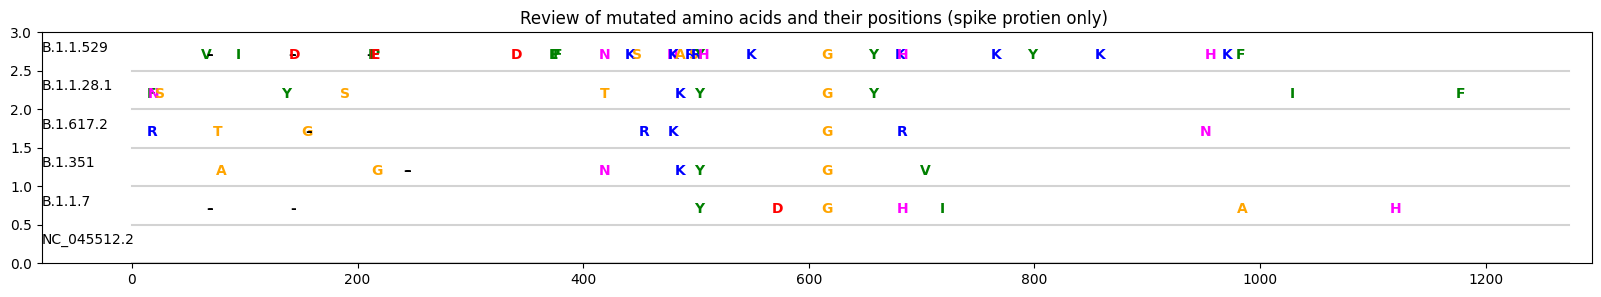

In [26]:
color = {"-" : "black", "G" : "orange", "A" : "orange", "S" : "orange", "T" : "orange", "C" : "green", "V" : "green", "I" : "green", "L" : "green", "F" : "green", "P" : "green", "Y" : "green", "M" : "green", "W" : "green", "N" : "magenta", "Q" : "magenta", "H" : "magenta", "D" : "red", "E" : "red", "K" : "blue", "R" : "blue"}
plt.figure(figsize=(20, 3))
mutated_aa = {}
for y, item in enumerate(seqs):
    y = y*.5
    plt.plot((0, len(seqs[wuhan_strain])), (y, y), color = "lightgrey")
    plt.text(-80, y+.3, item, va = "center", ha = "left")
    plt.xlim(-80, len(seqs[wuhan_strain]) + 20)
    plt.ylim(0, 3)
    plt.title('Review of mutated amino acids and their positions (spike protien only) ')
    for yy, mutation in enumerate(mutations[item]):
        pos = int(mutation[1:-1])
        aa_change = mutation[-1]
        plt.text(pos, y + .2, aa_change, va = "center", ha = "center", color = color[aa_change], fontweight = "bold")
        if aa_change in mutated_aa:
            mutated_aa[aa_change] += 1
        else: mutated_aa[aa_change] = 1

the plot above shows a summary of of the mutations in the variants. this provides an overview of the type of mutations and their positions on their respective sequences. Let's try to dig more to see if it's possible to find mutation patterns. bellow let's find the mutation frequencies and the aminoacids, this could help predict the PTMs involve in this process based on the amino acids.

## get are the mutaional frequencies


{'-': 14, 'Y': 8, 'D': 3, 'G': 7, 'H': 5, 'I': 4, 'A': 3, 'N': 5, 'K': 10, 'V': 2, 'R': 5, 'T': 2, 'F': 4, 'S': 4, 'E': 2, 'P': 2, 'L': 1}


Text(0.5, 1.0, 'Counts of Mutated Amino Acids in Variants (spike protein)')

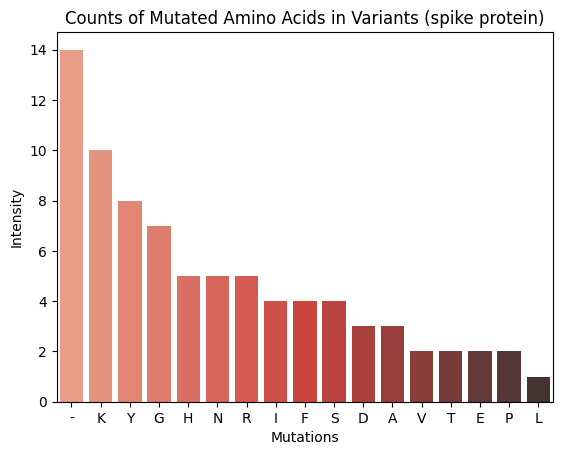

In [27]:
print(mutated_aa)
mutated_df = pd.DataFrame.from_dict(mutated_aa, orient = "index")
mutated_df = mutated_df.reset_index()
mutated_df = mutated_df.rename(columns = {"index" : "Mutations", 0 : "Intensity"})
sort = mutated_df.sort_values(by = "Intensity", ascending = False)
mutated_chart = sns.barplot(x = "Mutations", y = "Intensity", data = sort, palette = "Reds_d")
plt.title('Counts of Mutated Amino Acids in Variants (spike protein)')


## Post translational modification prediction

Based on the mutated amino acid let's predict the possible PTMs involve in the variants

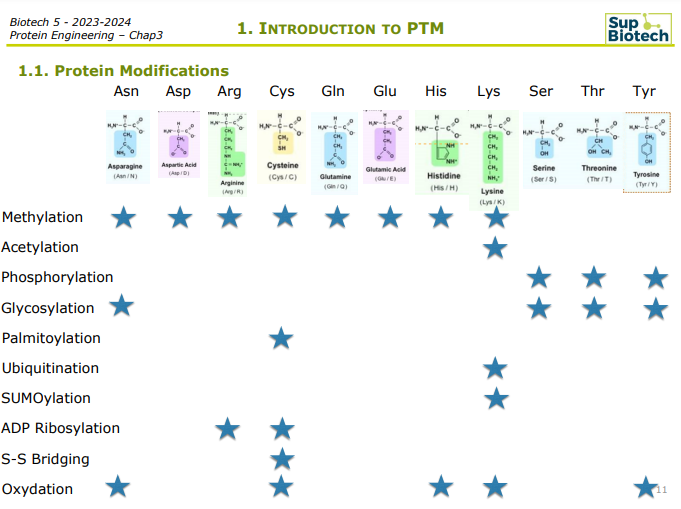

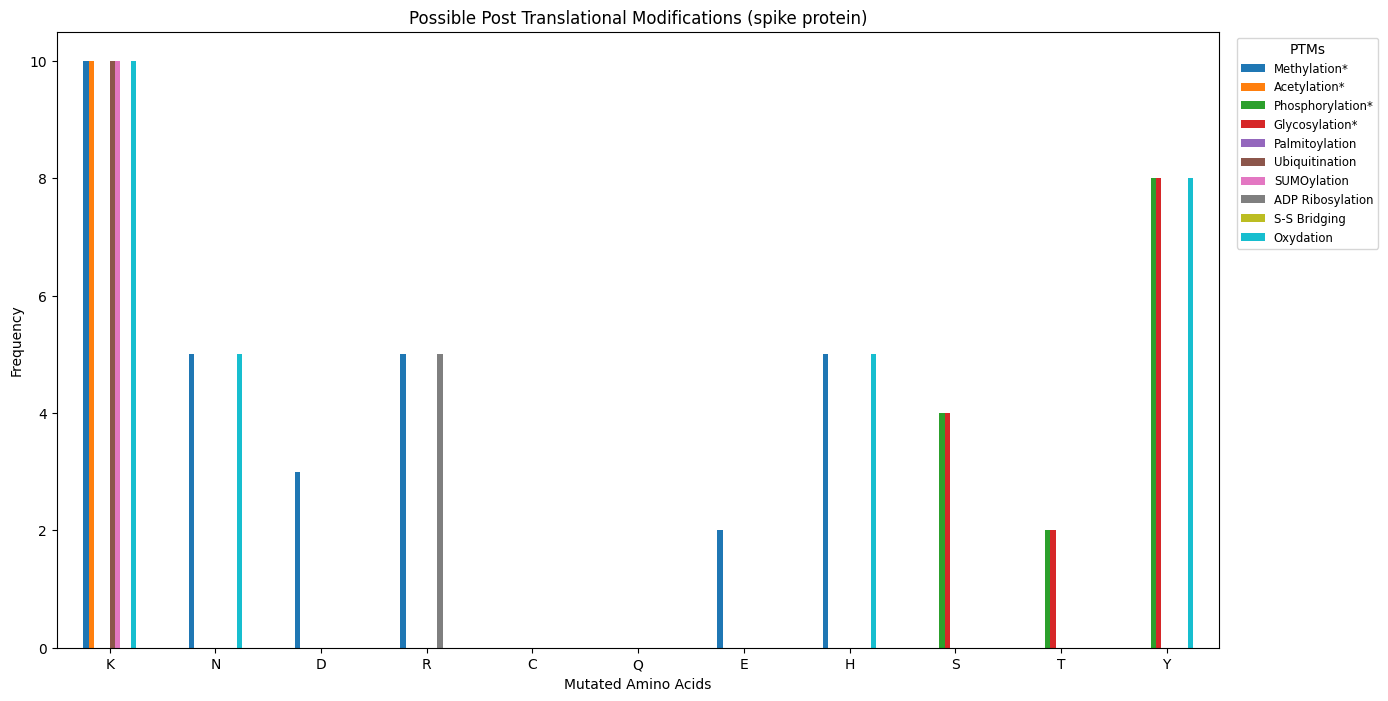

In [28]:
ptms = ["Methylation*", "Acetylation*", "Phosphorylation*", "Glycosylation*", "Palmitoylation", "Ubiquitination", "SUMOylation", "ADP Ribosylation", "S-S Bridging", "Oxydation"]
aa_that_can_undergo_ptm = ["K","N", "D", "R", "C", "Q", "E", "H", "S", "T", "Y"]
data = {
    "Acetylation*": ["K"],
    "Methylation*": ["N", "D", "R", "C", "Q", "E", "H", "K"],
    "Phosphorylation*": ["S", "T", "Y"],
    "Glycosylation*": ["S", "T", "Y"],
    "Palmitoylation": ["C"],
    "Ubiquitination": ["K"],
    "SUMOylation": ["K"],
    "ADP Ribosylation": ["R", "C"],
    "S-S Bridging": ["C"],
    "Oxydation": ["N", "C", "H", "K", "Y"]
}
# Filter PTMs based on amino acids that can undergo PTM
ptms_for_mutated_aa = {}
for aa in aa_that_can_undergo_ptm:
    ptms_for_mutated_aa[aa] = {}
    for ptm in ptms:
        ptms_for_mutated_aa[aa][ptm] = 0
#print(ptms_for_mutated_aa)
for aa, count in mutated_aa.items():
    if aa in ptms_for_mutated_aa:
        for ptm, ptm_aa in data.items():
            if aa in ptm_aa:
                ptms_for_mutated_aa[aa][ptm] += count
        
#print(ptms_for_mutated_aa)
df = pd.DataFrame(ptms_for_mutated_aa).T.reset_index()
ptms.insert(0, "Mutated aa") 
df.columns = ptms

df = pd.DataFrame(df)
df.plot(x='Mutated aa', kind='bar', figsize=(15, 8))
plt.xlabel('Mutated Amino Acids')
plt.ylabel('Frequency')
plt.title('Possible Post Translational Modifications (spike protein)')
plt.xticks(rotation=0)
plt.legend(title='PTMs', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize='small')
#plt.tight_layout()
plt.show()


Well, the above isn't the best view of possible post translational modifications that might had oaccured on the original wuhan strain but rather it will be better to say that the mutated amino acids will possibly undergo the mentioned post translational modifications.

The graph further summarizes the mutations present in variants from deletions, insertion to substitution.

In [29]:
#input id output sequence
seqs = {}
for entry in spikes_aa:
    seqs[entry.id] = entry.seq
seqs

{'NC_045512.2': Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...KLH'),
 'B.1.1.7': Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...KLH'),
 'B.1.351': Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...KLH'),
 'B.1.617.2': Seq('MFVFLVLLPLVSSQCVNLRTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...KLH'),
 'B.1.1.28.1': Seq('MFVFLVLLPLVSSQCVNFTNRTQLPSAYTNSFTRGVYYPDKVFRSSVLHSTQDL...KLH'),
 'B.1.1.529': Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...KLH')}

## find and graph the unmutated amino acids


['C', 'M', 'W', 'Q']
{'NC_045512.2': {'C': 40, 'M': 14, 'W': 12, 'Q': 62}, 'B.1.1.7': {'C': 40, 'M': 14, 'W': 12, 'Q': 62}, 'B.1.351': {'C': 40, 'M': 14, 'W': 12, 'Q': 62}, 'B.1.617.2': {'C': 40, 'M': 14, 'W': 12, 'Q': 62}, 'B.1.1.28.1': {'C': 40, 'M': 14, 'W': 12, 'Q': 62}, 'B.1.1.529': {'C': 40, 'M': 14, 'W': 12, 'Q': 59}}
       Variant   C   M   W   Q
0  NC_045512.2  40  14  12  62
1      B.1.1.7  40  14  12  62
2      B.1.351  40  14  12  62
3    B.1.617.2  40  14  12  62
4   B.1.1.28.1  40  14  12  62
5    B.1.1.529  40  14  12  59


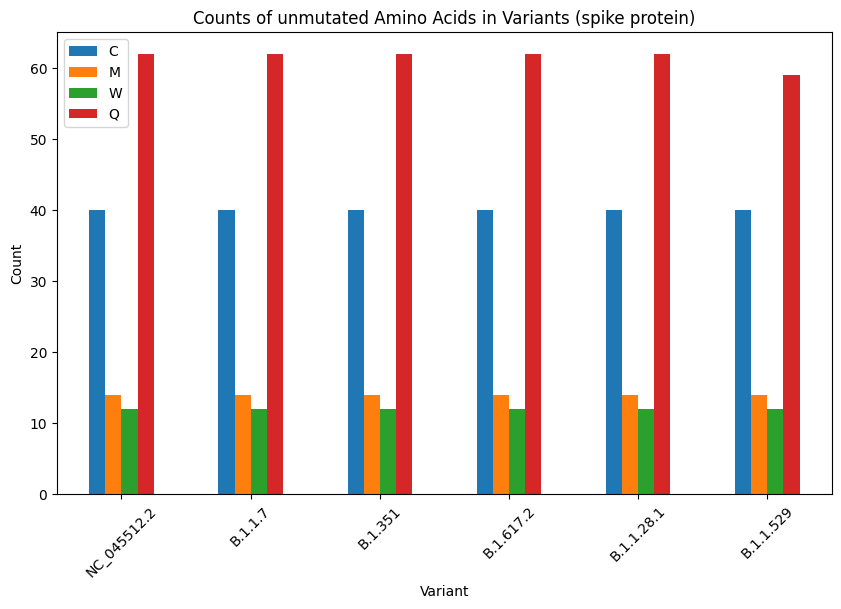

In [30]:
un_mutated_aa = []
un_mutated_count = {}
# Assuming color is a list of amino acids and mutated_aa contains mutated amino acids
for i in color:
    if i not in mutated_aa:
        un_mutated_aa.append(i)

print(un_mutated_aa)

# Assuming seqs is a dictionary where each key is a variant and its value is a sequence
for variant, sequence in seqs.items():
    un_mutated_count[variant] = {}
    for aa in un_mutated_aa:
        un_mutated_count[variant][aa] = sequence.count(aa)

print(un_mutated_count)
data = un_mutated_count
df = pd.DataFrame(data).T.reset_index()
un_mutated_aa.insert(0, "Variant")
df.columns = un_mutated_aa
print(df)

df = pd.DataFrame(df)
df.plot(x='Variant', kind='bar', figsize=(10, 6))
plt.xlabel('Variant')
plt.ylabel('Count')
plt.title('Counts of unmutated Amino Acids in Variants (spike protein)')
plt.xticks(rotation=45)
plt.show()

## Show all variants in a MSA 


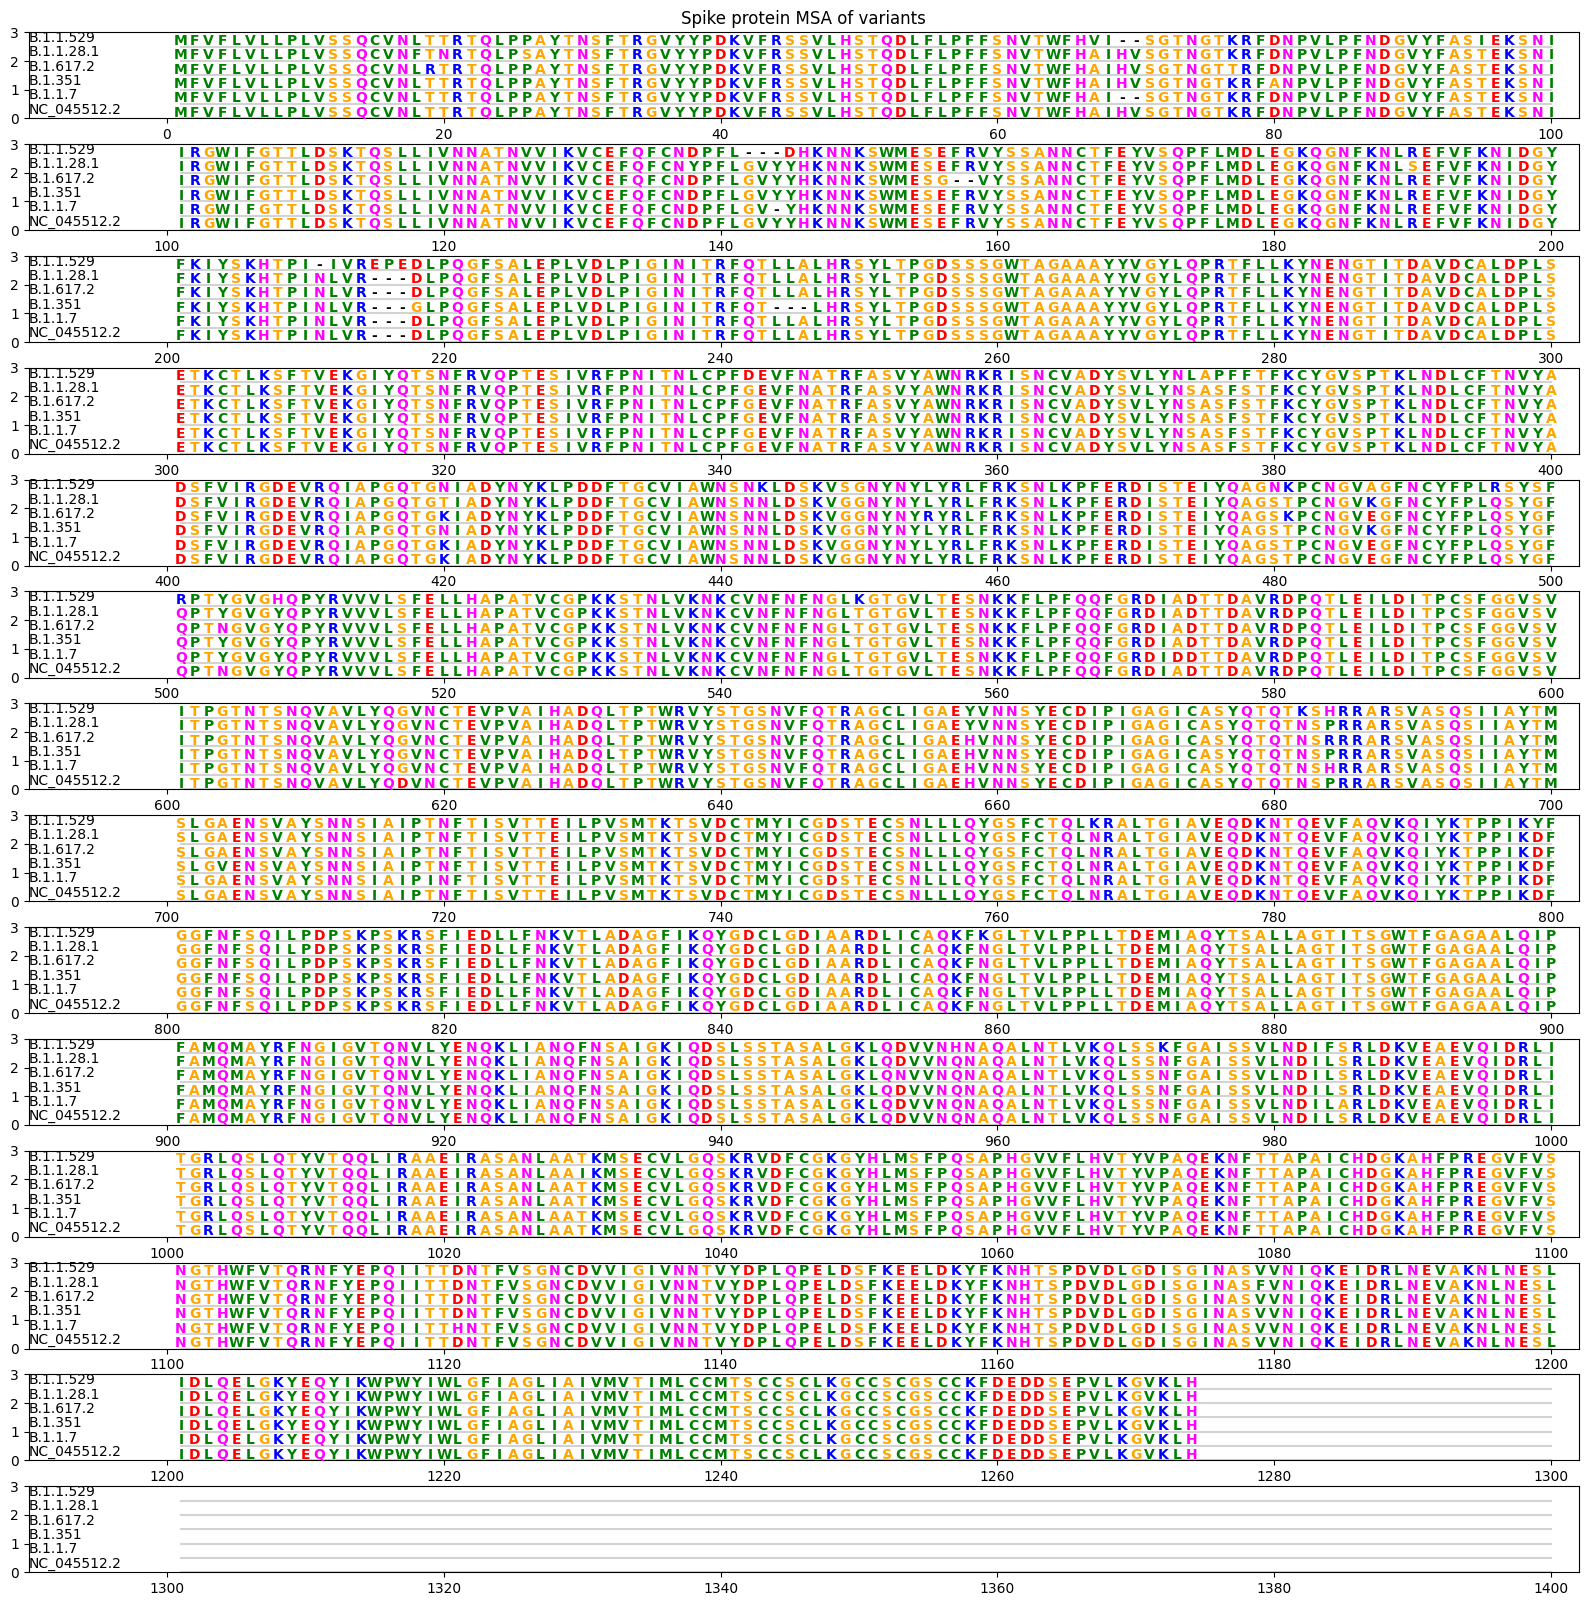

In [31]:
color = {"-" : "black", "G" : "orange", "A" : "orange", "S" : "orange", "T" : "orange", "C" : "green", "V" : "green", "I" : "green", "L" : "green", "F" : "green", "P" : "green", "Y" : "green", "M" : "green", "W" : "green", "N" : "magenta", "Q" : "magenta", "H" : "magenta", "D" : "red", "E" : "red", "K" : "blue", "R" : "blue"}
fig, plots = plt.subplots(14, 1, figsize=(20, 20))
for num, plot in enumerate(plots):
    for y, item in enumerate(seqs):   
        y = y*.5
        if num == 0: 
            plot.plot((1, 100), (y, y), color = "lightgrey")
            plot.text(-10, y+.3, item, va = "center", ha = "left")
            plot.set_xlim(-10, 100 + 2)
            plot.set_ylim(0, 3)
            plot.set_title("Spike protein MSA of variants")
            for pos, aa in enumerate(seqs[item][0:100]):
                plot.text(pos+1, y + .2, aa, va = "center", ha = "center", color = color[aa], fontweight = "bold")
        else: 
            plot.plot((num*100+1, (num + 1)*100), (y, y), color = "lightgrey")
            plot.text(num*100-10, y+.3, item, va = "center", ha = "left")
            plot.set_xlim(num*100-10, (num + 1)*100 + 2)
            plot.set_ylim(0, 3)
            for pos, aa in enumerate(seqs[item][num*100 : (num + 1) * 100]):
                plot.text(num*100 + pos+1 , y + .2, aa, va = "center", ha = "center", color = color[aa], fontweight = "bold")

        
        
plt.subplots_adjust(hspace = 0.3)

## still MSA of variants, zoom in to visualise


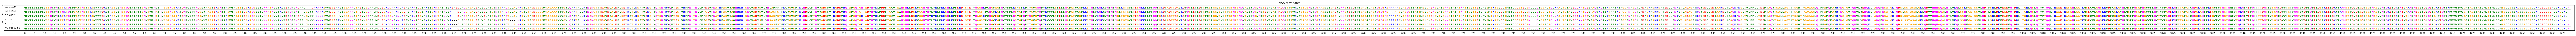

In [32]:
color = {"-" : "black", "G" : "orange", "A" : "orange", "S" : "orange", "T" : "orange", "C" : "green", "V" : "green", "I" : "green", "L" : "green", "F" : "green", "P" : "green", "Y" : "green", "M" : "green", "W" : "green", "N" : "magenta", "Q" : "magenta", "H" : "magenta", "D" : "red", "E" : "red", "K" : "blue", "R" : "blue"}
w = len(seqs[wuhan_strain])
plt.figure(figsize=(200, 2))
for y, item in enumerate(seqs):
    y = y*.5
    plt.plot((0, len(seqs[wuhan_strain])), (y, y), color = "lightgrey")
    plt.text(-10, y+.3, item, va = "center", ha = "left")
    plt.xlim(-10, len(seqs[wuhan_strain]) + 2)
    plt.ylim(0, 3)
    for tt, data in enumerate(seqs[item]):
        plt.text(tt, y + .2, data, va = "center", ha = "center", color = color[data], fontweight = "bold")
    plt.xticks(range(0, w + 1, 5)) 
    plt.title('MSA of variants')

## plot a distance evolutionary relationship


NC_045512.2 | Wuhan_strain
B.1.1.7 | Alpha
B.1.351 | Beta
B.1.617.2 | DeltA
B.1.1.28.1 | Gamma
B.1.1.529 | Omicron
Alignment with 6 rows and 1274 columns
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...KLH NC_045512.2
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...KLH B.1.1.7
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...KLH B.1.351
MFVFLVLLPLVSSQCVNLRTRTQLPPAYTNSFTRGVYYPDKVFR...KLH B.1.617.2
MFVFLVLLPLVSSQCVNFTNRTQLPSAYTNSFTRGVYYPDKVFR...KLH B.1.1.28.1
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...KLH B.1.1.529
NC_045512.2 0.000000
B.1.1.7 0.007849    0.000000
B.1.351 0.007849    0.012559    0.000000
B.1.617.2   0.007849    0.013344    0.014129    0.000000
B.1.1.28.1  0.009419    0.014129    0.011774    0.015699    0.000000
B.1.1.529   0.030612    0.029042    0.032967    0.034537    0.033752    0.000000
    NC_045512.2 B.1.1.7 B.1.351 B.1.617.2   B.1.1.28.1  B.1.1.529


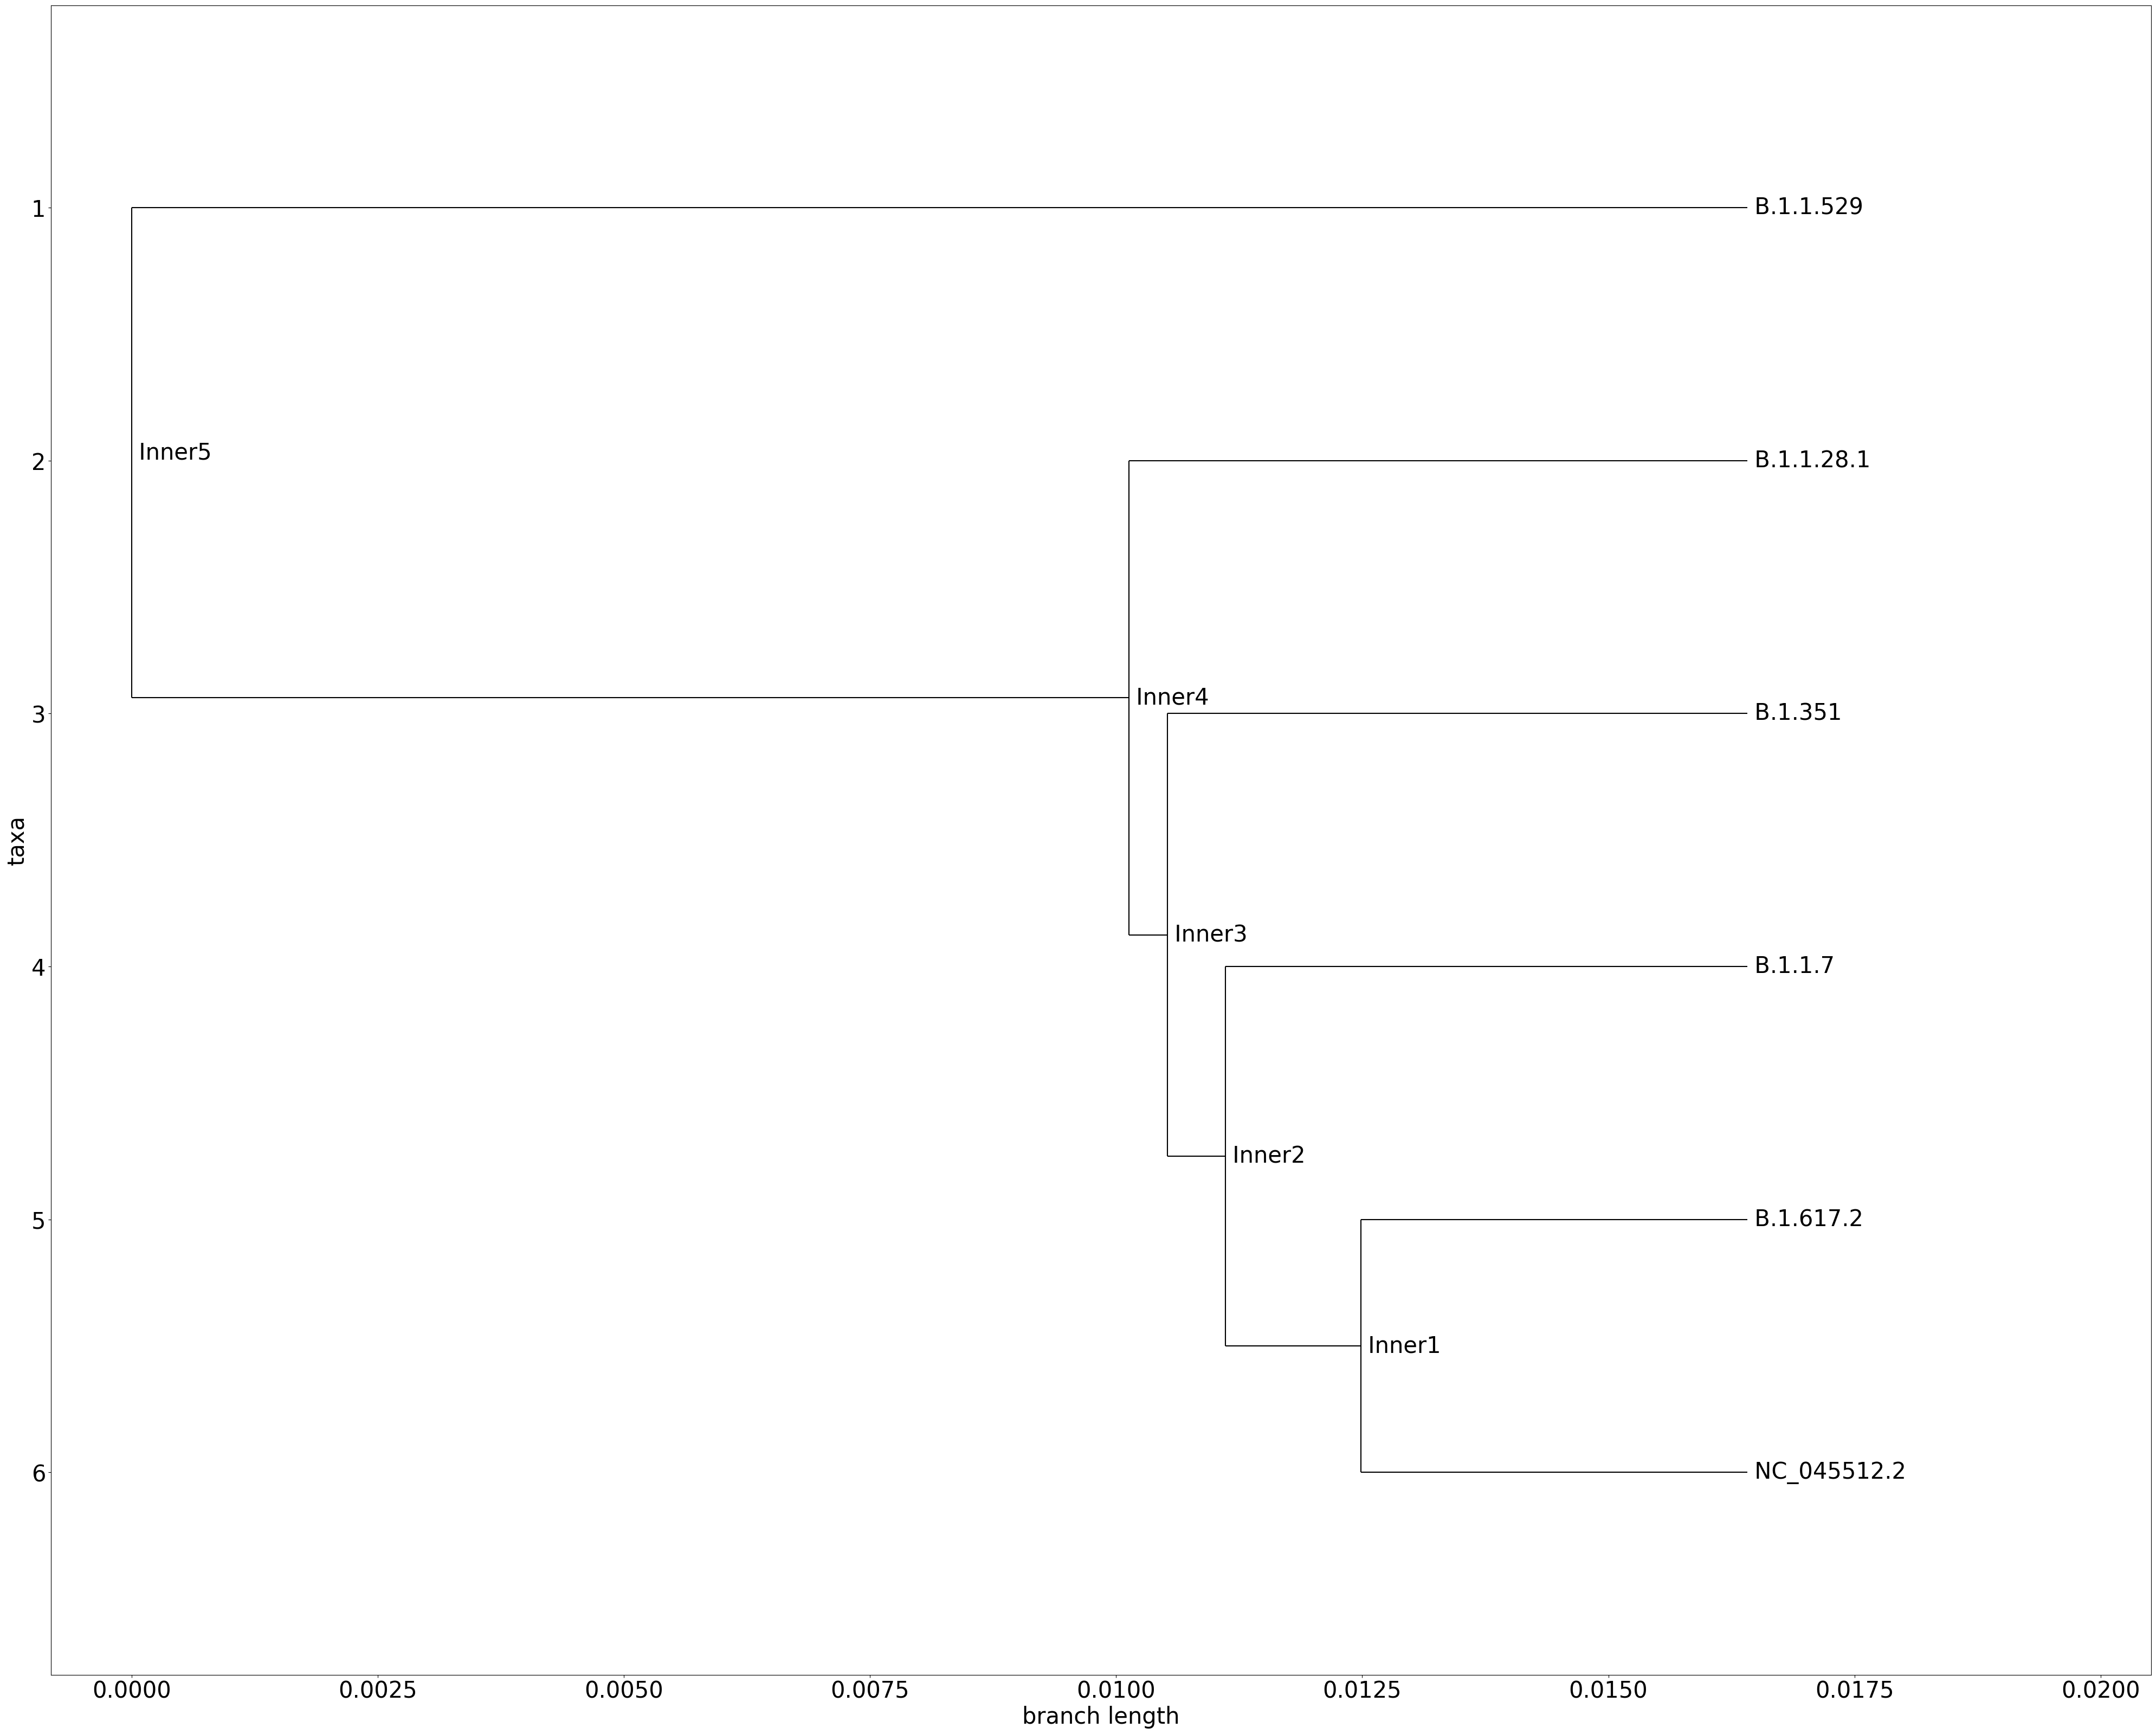

  ________________________________________________________________ B.1.1.529
_|
 |                                        ________________________ B.1.1.28.1
 |_______________________________________|
                                         | _______________________ B.1.351
                                         ||
                                          |   ____________________ B.1.1.7
                                          |__|
                                             |     _______________ B.1.617.2
                                             |____|
                                                  |_______________ NC_045512.2



In [33]:
fasta = list(SeqIO.parse(data_path, format = "fasta"))
for entry in fasta:
    print(entry.description)

# Read the alignment file
align = AlignIO.read("aligned_spikes.fasta", "fasta")
print(align)

# Calculate the distance matrix
calculator = DistanceCalculator("identity")
dm = calculator.get_distance(align)
print(dm)

# Construct the tree using UPGMA
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)

# Plot the tree
def plot_tree(tree, output_file):
    fig = plt.figure(figsize = (50, 40), dpi = 100)
    plt.rcParams.update({"font.size":30})
    axes = fig.add_subplot(1, 1, 1)
    fig1 = plt.gcf()
    Phylo.draw(tree, axes=axes)
    Phylo.draw_ascii(tree)
    fig1.savefig(output_file, dpi=100)
    return

plot_tree(tree, "tree.jpg")


The root of the tree is represented at the bottom, we can see that the Wuhan strain is the most ancestral node followed by the Delta and with more derived or recent lineage as the Omicron. Well we can futher use other allignment methods other than maft like clustal omega or muscle, and more stophisticated tree building algorithms like maximum likelyhodd and bayesian inference that can account for more complex evolutionary process. can as well take into account the complete sequence of the entire sequence of each variant and not just the spike sequence. Topology of the tree can be validated using bootstraping to assess robustness of the relationships. 